## Data loading and Data Cleaning

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE=32
IMAGE_SIZE= 256
CHANNELS=3
ePOCHS=50

In [ ]:
directory_path = "/content/drive/MyDrive/PlantVillage"

In [ ]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    directory_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)    

Found 1988 files belonging to 3 classes.


In [ ]:
class_names= dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[1 1 0 0 2 0 1 1 2 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 2 0 2 1 1]


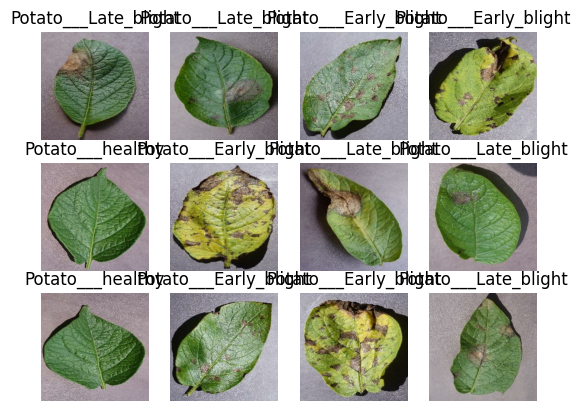

In [ ]:
for image_batch, labels_batch in dataset.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())
  for i in range(12):
    ax= plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[i]])
    plt.axis("off")

## Dividing dataset for training and testing

80% => Training 10% => validation 10% > test


In [ ]:
train_size= 0.8
len(dataset)* train_size

50.400000000000006

In [ ]:
train_ds= dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds= dataset.skip(54)
len(test_ds)

9

In [ ]:
val_size=0.1
len(dataset)*val_size

6.300000000000001

In [ ]:
test_ds= dataset.skip(54)
len(test_ds)

9

In [ ]:
val_size=0.1
len(dataset)* val_size

6.300000000000001

In [ ]:
test_ds= test_ds.take(6)
len(test_ds)

6

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle= True, shuffle_size= 10000):
  assert(train_split+ test_split+ val_split)==1

  ds_size= len(ds)

  if shuffle:
    ds= ds.shuffle(shuffle_size, seed=12)

  train_size= int(train_split*ds_size) 
  val_size= int(val_split* ds_size) 

  train_ds= ds.take(train_size)
  val_ds= ds.skip(train_size).take(val_size)
  test_ds= ds.skip(train_size).take(val_size)

  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds= get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

50

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

6

## Catching, shuffle & prefetch dataset

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)

In [ ]:
# normalizing
for image_batch, labels_batch in dataset.take(1):
  print(image_batch[0].numpy()/255)

[[[0.6745098  0.6627451  0.6901961 ]
  [0.68235296 0.67058825 0.69803923]
  [0.6901961  0.6784314  0.7058824 ]
  ...
  [0.54509807 0.5254902  0.5529412 ]
  [0.54901963 0.5294118  0.5568628 ]
  [0.5568628  0.5372549  0.5647059 ]]

 [[0.6862745  0.6745098  0.7019608 ]
  [0.69411767 0.68235296 0.70980394]
  [0.7019608  0.6901961  0.7176471 ]
  ...
  [0.5529412  0.53333336 0.56078434]
  [0.5647059  0.54509807 0.57254905]
  [0.5803922  0.56078434 0.5882353 ]]

 [[0.69803923 0.6862745  0.7137255 ]
  [0.7019608  0.6901961  0.7176471 ]
  [0.7058824  0.69411767 0.72156864]
  ...
  [0.56078434 0.5411765  0.5686275 ]
  [0.5647059  0.54509807 0.57254905]
  [0.5686275  0.54901963 0.5764706 ]]

 ...

 [[0.5803922  0.5568628  0.57254905]
  [0.57254905 0.54901963 0.5647059 ]
  [0.5647059  0.5411765  0.5568628 ]
  ...
  [0.44313726 0.4        0.41568628]
  [0.44705883 0.40392157 0.41960785]
  [0.44313726 0.4        0.41568628]]

 [[0.58431375 0.56078434 0.5764706 ]
  [0.5764706  0.5529412  0.5686275 ]


In [ ]:
resize_and_rescale = tf.keras.Sequential([
    # image resize 255x256
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
]
)

## Data augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
    # image resize 255x256
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
]
)

## Creating Models

In [ ]:
# CNN
input_shape= (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

n_classes=3

model= models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # FLatten
    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    layers.Dense(n_classes, activation='softmax'),

])

model.build(input_shape= input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

## Compiling Model

In [ ]:
model.compile(
    optimizer= 'adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics=['accuracy']
)

In [ ]:
history= model.fit(
    train_ds,
    batch_size= BATCH_SIZE,
    validation_data= val_ds,
    verbose=1,
    epochs= ePOCHS
)

Epoch 1/50
50/50 [==============================] - 394s 5s/step - loss: 0.9243 - accuracy: 0.4917 - val_loss: 0.8366 - val_accuracy: 0.5938
Epoch 2/50
50/50 [==============================] - 253s 5s/step - loss: 0.7751 - accuracy: 0.6412 - val_loss: 0.6819 - val_accuracy: 0.5938
Epoch 3/50
50/50 [==============================] - 254s 5s/step - loss: 0.5818 - accuracy: 0.7316 - val_loss: 0.4828 - val_accuracy: 0.7500
Epoch 4/50
50/50 [==============================] - 245s 5s/step - loss: 0.3930 - accuracy: 0.8480 - val_loss: 0.3418 - val_accuracy: 0.8490
Epoch 5/50
50/50 [==============================] - 255s 5s/step - loss: 0.2935 - accuracy: 0.8779 - val_loss: 0.2507 - val_accuracy: 0.8958
Epoch 6/50
50/50 [==============================] - 247s 5s/step - loss: 0.2773 - accuracy: 0.8874 - val_loss: 0.2319 - val_accuracy: 0.9167
Epoch 7/50
50/50 [==============================] - 246s 5s/step - loss: 0.2511 - accuracy: 0.8989 - val_loss: 0.2306 - val_accuracy: 0.9062
Epoch 8/50
50

In [ ]:
scores= model.evaluate(test_ds)

6/6 [==============================] - 13s 1s/step - loss: 0.0292 - accuracy: 0.9896


In [ ]:
scores

[0.029177913442254066, 0.9895833134651184]

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 50}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['loss']

[0.924329400062561,
 0.7751486301422119,
 0.5818464159965515,
 0.39300304651260376,
 0.2934912443161011,
 0.27726274728775024,
 0.25113269686698914,
 0.247735396027565,
 0.18501107394695282,
 0.1473337709903717,
 0.11042005568742752,
 0.12251978367567062,
 0.17620444297790527,
 0.09345084428787231,
 0.06661537289619446,
 0.10566231608390808,
 0.14468927681446075,
 0.12344764918088913,
 0.08082705736160278,
 0.06061750650405884,
 0.044186025857925415,
 0.05361590161919594,
 0.05767557770013809,
 0.05255856737494469,
 0.048226937651634216,
 0.04927710071206093,
 0.06896713376045227,
 0.1071605533361435,
 0.055460285395383835,
 0.04168450087308884,
 0.0343967005610466,
 0.02556239254772663,
 0.057922229170799255,
 0.031196491792798042,
 0.018697619438171387,
 0.024028979241847992,
 0.04496987909078598,
 0.022638576105237007,
 0.04306245595216751,
 0.02730829454958439,
 0.03324095532298088,
 0.050752077251672745,
 0.054235029965639114,
 0.03526825085282326,
 0.06192822754383087,
 0.0244563

In [ ]:
len(history.history['loss'])

50

In [ ]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']

loss= history.history['loss']
val_loss= history.history['val_loss']

In [ ]:
plt.figure(figsize(8,8))
plt.subplot(1,2,1)
plt.plot(range(ePOCHS), acc,label='Training Accuracy')
plt.plot(range(ePOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(ePOCHS), loss, label='Training Loss')
plt.plot(range(ePOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: ignored

First image to predict: 
Actual Label: Potato___Late_blight
1/1 [==============================] - 1s 1s/step
Predicted Label: Potato___Late_blight
First image to predict: 
Actual Label: Potato___Early_blight
1/1 [==============================] - 1s 1s/step
Predicted Label: Potato___Early_blight
First image to predict: 
Actual Label: Potato___Late_blight
1/1 [==============================] - 1s 1s/step
Predicted Label: Potato___Late_blight
First image to predict: 
Actual Label: Potato___Late_blight
1/1 [==============================] - 1s 1s/step
Predicted Label: Potato___Late_blight
First image to predict: 
Actual Label: Potato___Late_blight
1/1 [==============================] - 1s 1s/step
Predicted Label: Potato___Late_blight
First image to predict: 
Actual Label: Potato___Late_blight
1/1 [==============================] - 1s 1s/step
Predicted Label: Potato___Late_blight


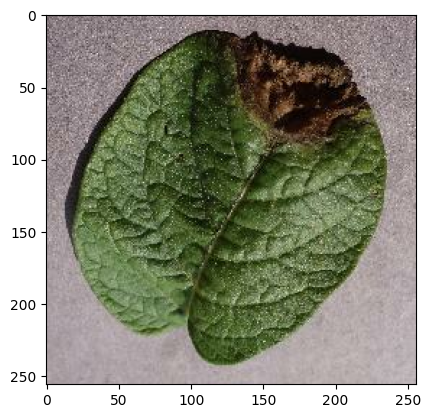

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(6):
  first_image= images_batch[0].numpy().astype("uint8")

  print("First image to predict: ")
  plt.imshow(first_image)
  print("Actual Label:", class_names[labels_batch[0].numpy()])

  batch_prediction= model.predict(images_batch)
  print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])  # max number ka index

In [ ]:
# from PIL import Image
# import numpy as np

In [ ]:
# pot_healthy= '/content/drive/MyDrive/PlantVillage/Potato___healthy'

# import os

# folder_path = '/content/drive/MyDrive/PlantVillage/Potato___Early_blight'

# # Iterate over the files in the folder
# for filename in os.listdir(folder_path):
#     # Check if the file has an image extension (e.g., .jpg, .png)
#     if filename.endswith('.jpg') or filename.endswith('.png')or filename.endswith('.JPG'):
#         # Print the absolute path of the image
#         image_path = os.path.join(folder_path, filename)
#         image = Image.open(image_path)
#         image = image.resize((256, 256))  # Adjust size as required
#         image = np.array(image) / 255.0  # Normalize pixel values
#         # image= image.numpy().astype("uint8")

#         # Add an extra dimension to match the input shape expected by the model
#         image = np.expand_dims(image, axis=0)

#         # Make the prediction
#         predictions = model.predict(image)

#         # Get the predicted class
#         # predicted_class = np.argmax(predictions)
#         prediction_class= class_names[np.argmax(predictions[0])]

#         # Define a mapping for class labels
#         # class_labels = ['Early Blight', 'Late Blight', 'Healthy']

#         # Print the predicted class
#         print('Predicted class:', prediction_class)
#         # print('Predicted class:', predicted_class)


In [ ]:
# image_path='/content/drive/MyDrive/PlantVillage/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG'
# image = Image.open(image_path)
# image = image.resize((256, 256) ) # Adjust size as required
# # image = np.array(image) / 255.0  # Normalize pixel values
# image= image.numpy().astype("uint8")

# # Add an extra dimension to match the input shape expected by the model
# # image = np.expand_dims(image, axis=0)

# # Make the prediction
# predictions = model.predict(image)
# print(predictions)
# # Get the predicted class
# # predicted_class = np.argmax(predictions)
# print(np.argmax(predictions[0]))
# prediction_class= class_names[np.argmax(predictions[0])]

# # Define a mapping for class labels
# # class_labels = ['Early Blight', 'Late Blight', 'Healthy']

# # Print the predicted class
# print('Predicted class:', prediction_class)
# # print('Predicted class:', predicted_class)


AttributeError: ignored